
###Assignment 3: Predicting Sales Revenue from Advertising Budget

####**Problem Statement**
Marketing teams often need to predict the return on advertising investments. This model will use polynomial regression to predict sales_revenue based on advertising_budget, capturing nonlinear trends that can reflect the diminishing returns on ad spend.

####**How the Model Will Help**
This model can help marketing departments plan their ad budgets more effectively, ensuring they allocate resources to maximize revenue and avoid unnecessary spending.

####**Data Description**
The dataset contains two columns:
- advertising_budget: The amount spent on advertising in dollars.
- sales_revenue: The resulting sales revenue in dollars.

#### **Instructions**
- Load and Explore: Load the dataset and plot advertising_budget against sales_revenue to observe any nonlinear relationship.
- Feature Transformation: Transform the advertising_budget feature to polynomial terms (e.g., degree 2 or 3).
- Model Training: Split the data into training (80%) and testing (20%) sets, and train a polynomial regression model to predict sales_revenue.
- Visualization: Plot the polynomial regression curve against the actual data points for visualization.


   advertising_budget  sales_revenue
0                8621          51891
1                4093          18872
2                5810          32405
3                9434          55497
4                7874          44009


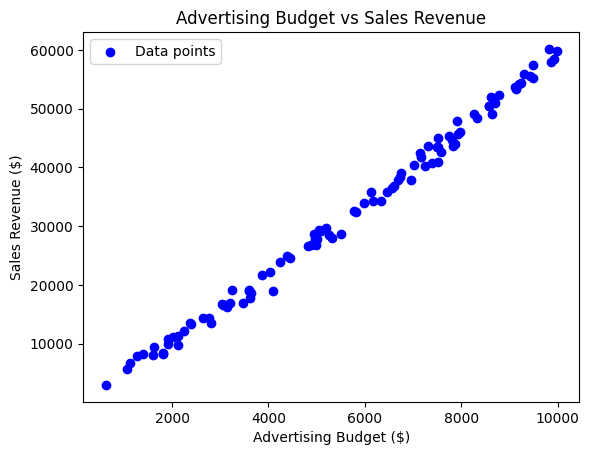

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





In [ ]:
data = pd.read_csv("polynomial_regression_data.csv")

In [ ]:
print(data.head())




In [ ]:
plt.scatter(data['advertising_budget'], data['sales_revenue'], color='blue', label='Data points')
plt.xlabel("Advertising Budget ($)")
plt.ylabel("Sales Revenue ($)")
plt.title("Advertising Budget vs Sales Revenue")
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly_features = PolynomialFeatures(degree=degree)

X_poly = poly_features.fit_transform(data[['advertising_budget']])

print(f"Original feature: \n{data[['advertising_budget']].head()}")
print(f"Transformed features (degree={degree}): \n{X_poly[:5]}")


Original feature: 
   advertising_budget
0                8621
1                4093
2                5810
3                9434
4                7874
Transformed features (degree=2): 
[[1.0000000e+00 8.6210000e+03 7.4321641e+07]
 [1.0000000e+00 4.0930000e+03 1.6752649e+07]
 [1.0000000e+00 5.8100000e+03 3.3756100e+07]
 [1.0000000e+00 9.4340000e+03 8.9000356e+07]
 [1.0000000e+00 7.8740000e+03 6.1999876e+07]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = X_poly
y = data['sales_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Mean Squared Error: 1313425.3342947424
R-squared Score: 0.9931827907468221


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)



In [ ]:

y_pred = model.predict(X_test)




In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


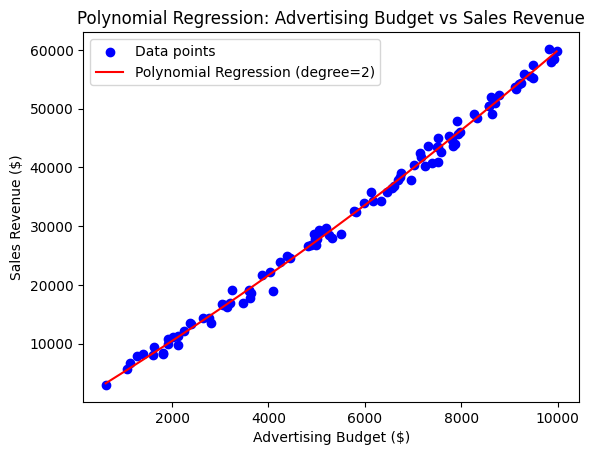

In [ ]:

X_seq = np.linspace(data['advertising_budget'].min(), data['advertising_budget'].max(), 300).reshape(-1, 1)
X_seq_poly = poly_features.transform(X_seq)
y_seq_pred = model.predict(X_seq_poly)

plt.scatter(data['advertising_budget'], data['sales_revenue'], color='blue', label='Data points')
plt.plot(X_seq, y_seq_pred, color='red', label=f'Polynomial Regression (degree={degree})')
plt.xlabel("Advertising Budget ($)")
plt.ylabel("Sales Revenue ($)")
plt.title("Polynomial Regression: Advertising Budget vs Sales Revenue")
plt.legend()
plt.show()
